<a href="https://colab.research.google.com/github/Shyams728/copper_ml_project/blob/main/copper_EDA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
processed_data = pd.read_excel(r'/content/drive/MyDrive/data/processed_Copper_Set_cleaned.xlsx')

In [ ]:
df = processed_data.copy()

In [ ]:
catagory_columns = ['country_code','customer_code','application','product_ref']
for data in catagory_columns:
  df[data]= df[data].astype('category')

In [ ]:
# Convert 'item_date' and 'delivery_date' to datetime if they are not already
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181664 entries, 0 to 181663
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181664 non-null  datetime64[ns]
 1   quantity_tons  181664 non-null  float64       
 2   customer_code  181664 non-null  category      
 3   country_code   181664 non-null  category      
 4   status         181664 non-null  object        
 5   item_type      181664 non-null  object        
 6   application    181664 non-null  category      
 7   thickness      181664 non-null  float64       
 8   width          181664 non-null  float64       
 9   product_ref    181664 non-null  category      
 10  delivery_date  181664 non-null  datetime64[ns]
 11  selling_price  181664 non-null  float64       
dtypes: category(4), datetime64[ns](2), float64(4), object(2)
memory usage: 12.0+ MB


In [ ]:
# Check the first few rows of the DataFrame
df.head()

,item_date,quantity_tons,customer_code,country_code,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,640665,2021-03-01,577.00


In [ ]:
# Basic statistics for numerical columns
print(df.describe())

       quantity_tons      thickness          width  selling_price
count   1.816640e+05  181664.000000  181664.000000   1.816640e+05
mean    5.875236e+03       2.564877    1295.292755   1.918084e+03
std     2.349133e+06       6.572458     261.632547   3.318029e+05
min     1.000000e-05       0.180000       1.000000  -1.160000e+03
25%     1.097030e+01       0.700000    1180.000000   6.690000e+02
50%     3.036464e+01       1.500000    1250.000000   8.120000e+02
75%     6.716134e+01       3.000000    1500.000000   9.530000e+02
max     1.000000e+09    2500.000000    2990.000000   1.000010e+08


In [ ]:
# Count of unique values in categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())



Unique values in customer_code:
30157111    4988
30161088    3733
30201846    3152
30165529    2728
30202938    2570
            ... 
30329897       1
30272384       1
30147616       1
30271383       1
12458          1
Name: customer_code, Length: 1169, dtype: int64

Unique values in country_code:
78     32084
26     27515
25     23361
27     21508
32     18658
28     15823
84     12776
77      9714
30      8702
39      3730
79      2742
38      1712
40      1683
80       817
113      714
89        92
44        28
107        5
Name: country_code, dtype: int64

Unique values in status:
Won                116007
Lost                34436
Not lost for AM     19572
Revised              4276
To be approved       4169
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

Unique values in item_type:
W         105611
S          69231
PL          5660
Others       610
WI           524
IPL           27
SLAWR          

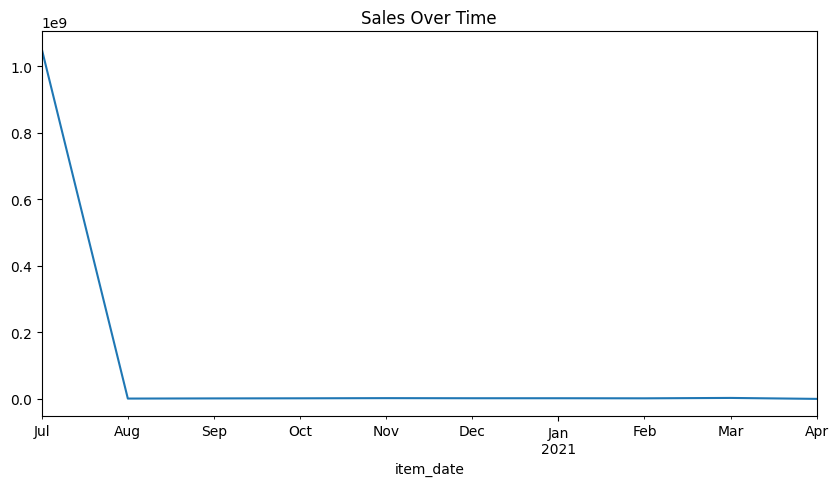

In [ ]:
# Time series analysis: Sales over time
df['item_date'] = pd.to_datetime(df['item_date'])
sales_over_time = df.groupby(df['item_date'].dt.to_period("M"))['quantity_tons'].sum()
sales_over_time.plot(kind='line', figsize=(10, 5), title='Sales Over Time')
plt.show()


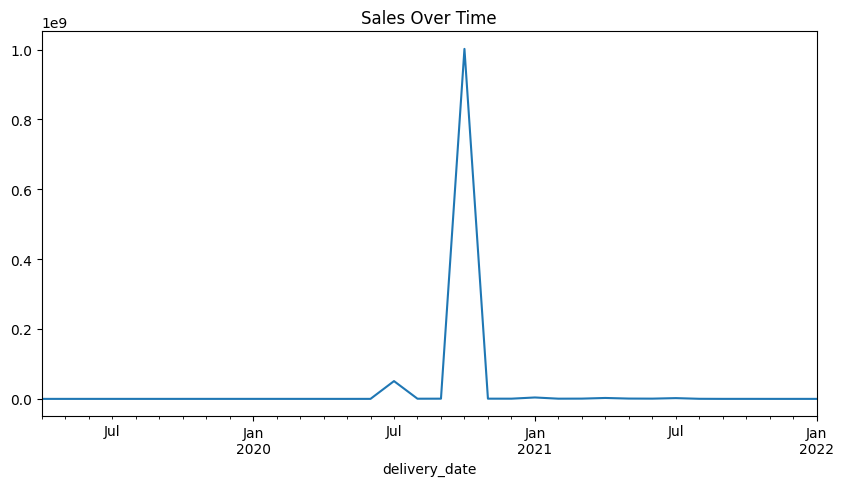

In [ ]:
# Time series analysis: Sales over time
sales_over_time = df.groupby(df['delivery_date'].dt.to_period("M"))['quantity_tons'].sum()
sales_over_time.plot(kind='line', figsize=(10, 5), title='Sales Over Time')
plt.show()


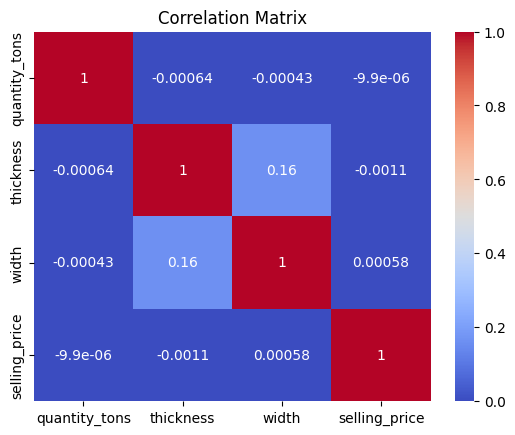

In [ ]:
# Correlation matrix
corr_matrix = df.select_dtypes(include=['float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

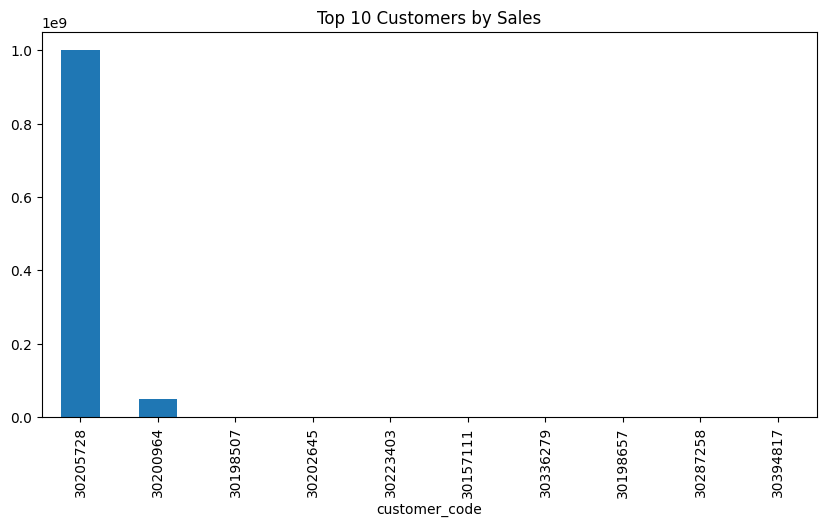

In [ ]:
# Sales by customer
sales_by_customer = df.groupby('customer_code')['quantity_tons'].sum().sort_values(ascending=False)
sales_by_customer.head(10).plot(kind='bar', figsize=(10, 5), title='Top 10 Customers by Sales')
plt.show()

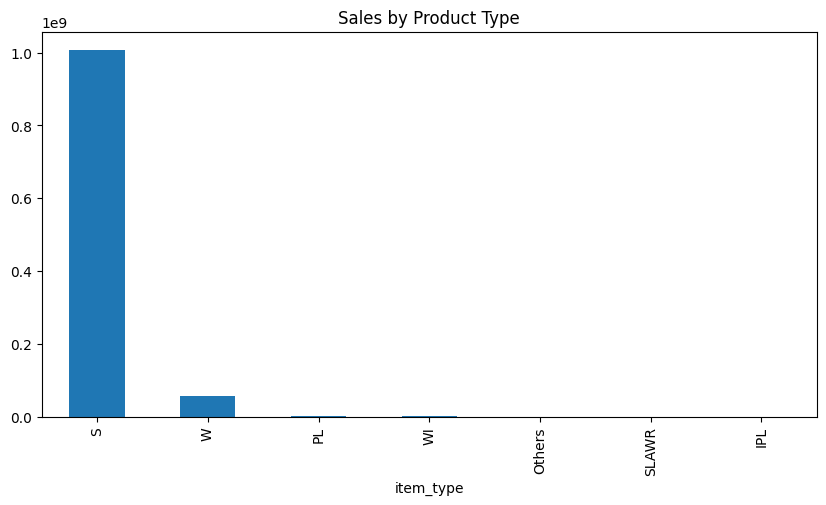

In [ ]:
# Sales by product type
sales_by_product = df.groupby('item_type')['quantity_tons'].sum().sort_values(ascending=False)
sales_by_product.plot(kind='bar', figsize=(10, 5), title='Sales by Product Type')
plt.show()

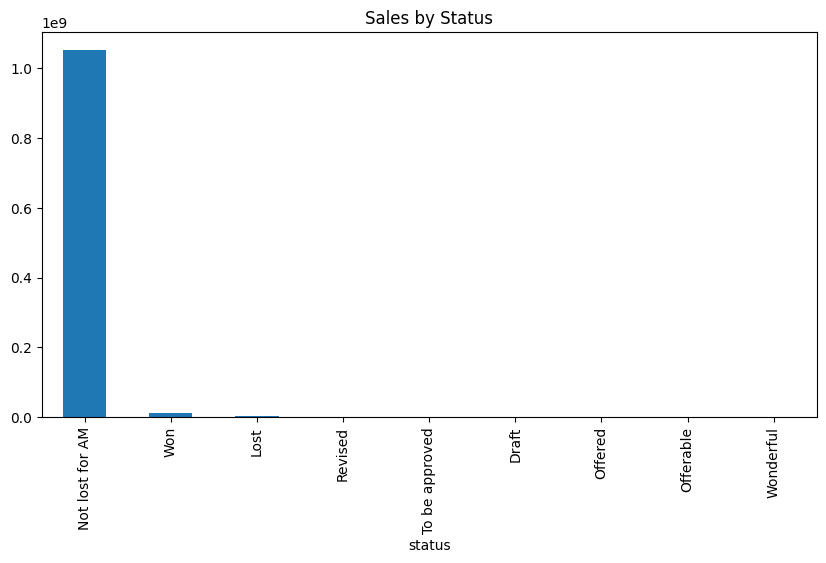

In [ ]:
# Sales by status
sales_by_status = df.groupby('status')['quantity_tons'].sum().sort_values(ascending=False)
sales_by_status.plot(kind='bar', figsize=(10, 5), title='Sales by Status')
plt.show()

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['quantity_tons', 'thickness', 'width', 'selling_price'], dtype='object')

In [ ]:

# Detecting outliers in 'quantity_tons', 'thickness', 'width', 'selling_price'

# Using the IQR method to detect outliers
numeric_columns = ['quantity_tons', 'thickness', 'width', 'selling_price']

# Define a function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for each column and concatenate the results
outliers = pd.concat([detect_outliers(df, column) for column in numeric_columns])

# Print the number of outliers detected
print(f"Number of outliers detected: {len(outliers)}")


Number of outliers detected: 50738


The np.log1p function is used to apply the log transformation, which is equivalent to log(1 + x) to avoid taking the log of zero when 'feature column' has zero or negative values.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


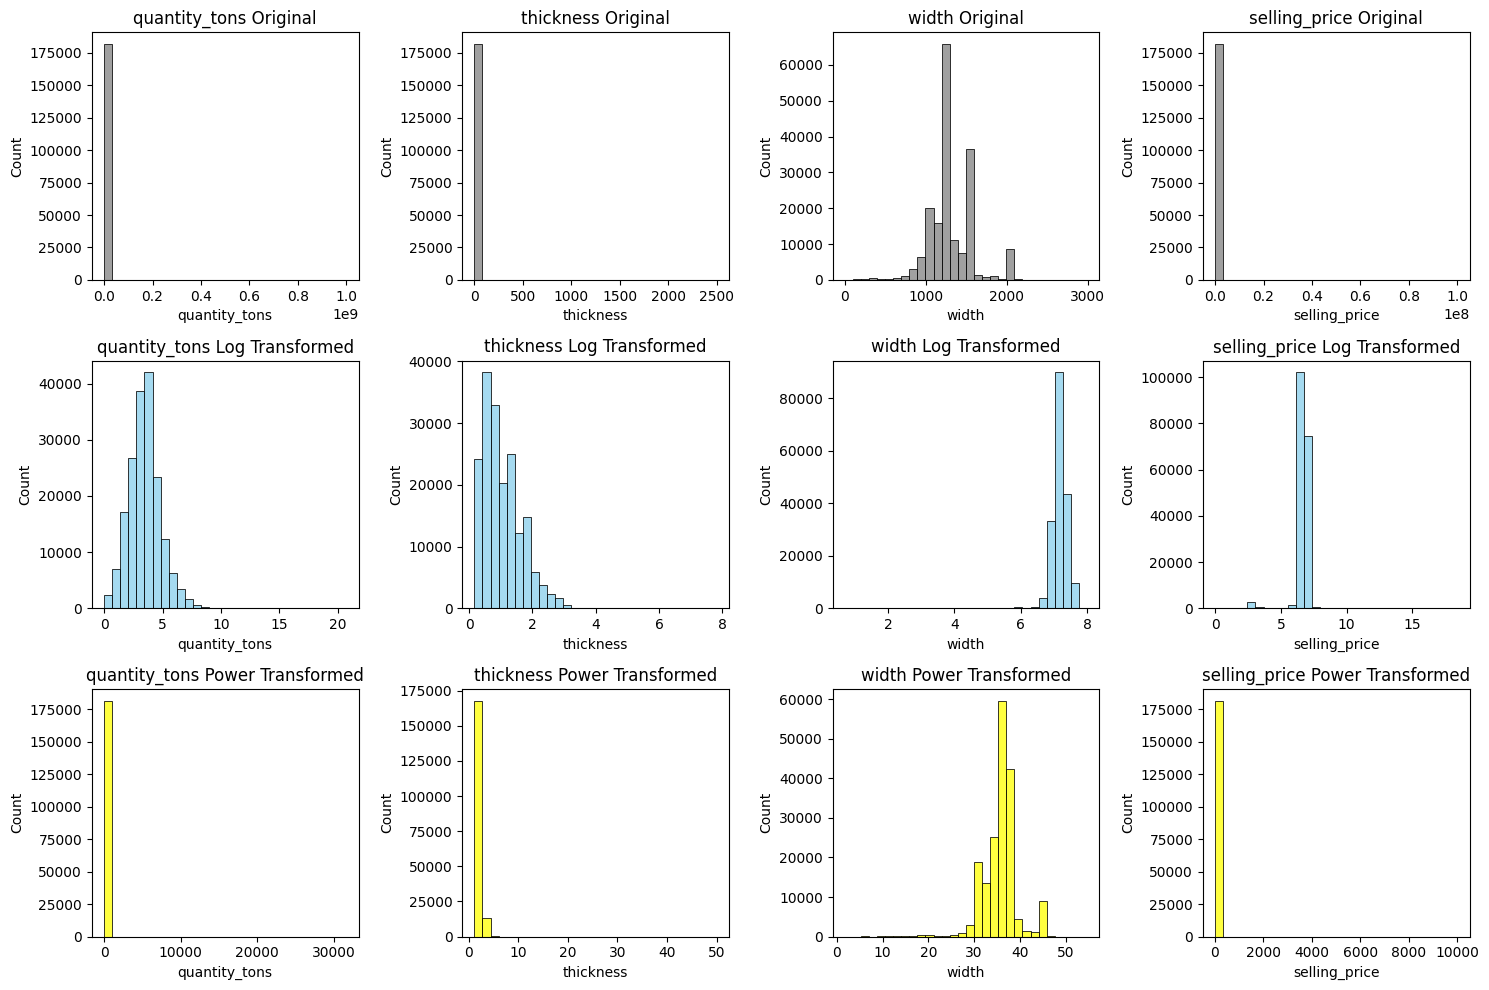

In [ ]:
# Assuming df is your DataFrame and numeric_columns is a list of column names
numeric_columns = df.select_dtypes(include='number').columns.tolist()
num_plots = len(numeric_columns)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    # Plot original histogram
    plt.subplot(3, num_plots, i)
    sns.histplot(df[col], kde=False, bins=30, color='grey')
    plt.title(f'{col} Original')

    # Log transform
    log_data = np.log1p(df[col])  # Use log1p to avoid log of zero for non-positive values

    # Plot log transformed histogram
    plt.subplot(3, num_plots, i + num_plots)
    sns.histplot(log_data, bins=30, color='skyblue')
    plt.title(f'{col} Log Transformed')

    # Power transform
    # Add a small constant to avoid taking the root of negative values
    power_data = np.power(df[col] + np.abs(df[col].min()) + 1, 1/2)

    # Plot power transformed histogram
    plt.subplot(3, num_plots, i + 2*num_plots)
    sns.histplot(power_data, bins=30, color='yellow')
    plt.title(f'{col} Power Transformed')

plt.tight_layout()
plt.show()

In [ ]:
for col in numeric_columns:
    # Count and display the number of zero or negative values in the current column
    num_zero_negative_values = (df[col] <= 0).sum()
    print(f'Column "{col}": {num_zero_negative_values} zero or negative values')

    df[f'log_trans_{col}'] = np.log1p(df[col])


Column "quantity_tons": 0 zero or negative values
Column "thickness": 0 zero or negative values
Column "width": 0 zero or negative values
Column "selling_price": 7 zero or negative values


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


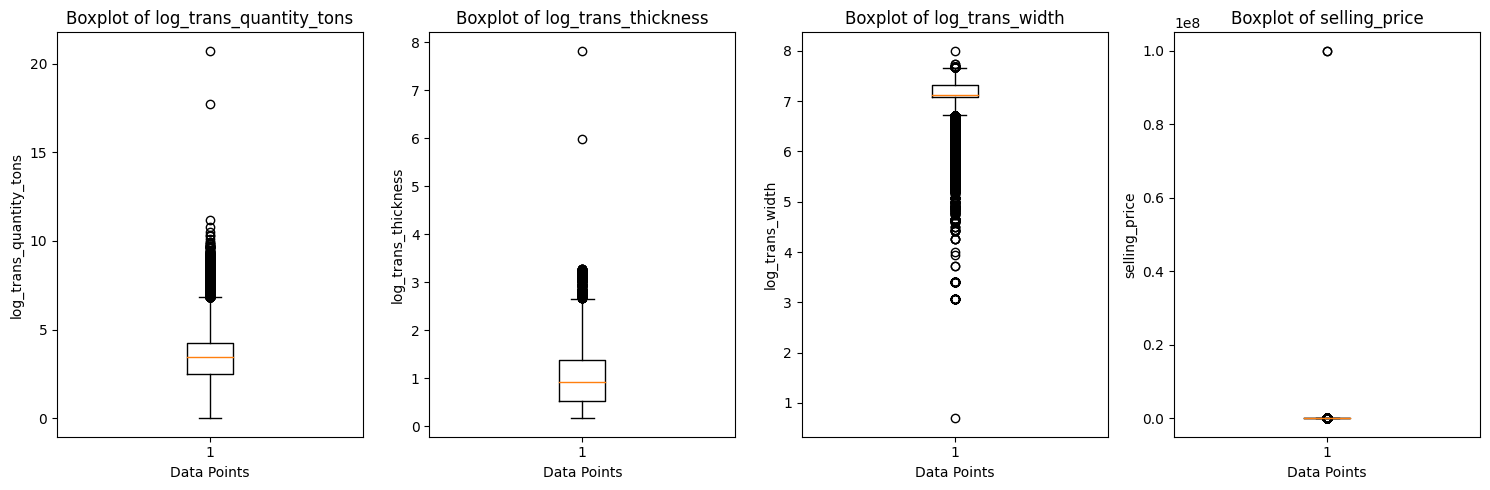

In [ ]:
log_tran_col = ['log_trans_quantity_tons',	'log_trans_thickness',	'log_trans_width',	'selling_price']

# Create a single figure with subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(log_tran_col, 1):  # Start index from 1

    # Plot boxplot
    plt.subplot(1, len(log_tran_col), i)
    plt.boxplot(df[col])
    # plt.violinplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Data Points')
    plt.ylabel(col)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()
